# 🎾Сравнение моделей (LightGBM плохо настроен)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Данные о метриках моделей для 4 тестовых наборов
models_data_test1 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [94.31, 93.50, 95.12, 86.18],
    'Precision': [90.91, 94.92, 92.31, 78.21],
    'Recall': [98.36, 91.80, 98.36, 100.00],
    'F1-score': [94.49, 93.33, 95.24, 87.77],
    'ROC AUC': [99.10, 98.97, 99.39, 98.84],
    'Log Loss': [0.1269, 0.1468, 0.1081, 0.5621]
}

models_data_test2 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [91.87, 91.06, 93.50, 86.18],
    'Precision': [89.23, 93.10, 90.77, 78.95],
    'Recall': [95.08, 88.52, 96.72, 98.36],
    'F1-score': [92.06, 90.76, 93.65, 87.59],
    'ROC AUC': [98.52, 98.55, 98.73, 98.04],
    'Log Loss': [0.1427, 0.1753, 0.1597, 0.5371]
}

models_data_test3 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [94.31, 94.31, 94.31, 95.12],
    'Precision': [90.91, 96.55, 90.91, 100.00],
    'Recall': [98.36, 91.80, 98.36, 90.16],
    'F1-score': [94.49, 94.12, 94.49, 94.83],
    'ROC AUC': [99.13, 98.89, 99.15, 99.29],
    'Log Loss': [0.1282, 0.1683, 0.1377, 0.1238]
}

models_data_test4 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [92.68, 91.87, 93.50, 94.31],
    'Precision': [90.62, 94.74, 90.77, 100.00],
    'Recall': [95.08, 88.52, 96.72, 88.52],
    'F1-score': [92.80, 91.53, 93.65, 93.91],
    'ROC AUC': [98.65, 98.33, 98.47, 98.84],
    'Log Loss': [0.1438, 0.1921, 0.1602, 0.1508]
}

models_data_test5 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [91.87, 88.62, 85.37, 91.87],
    'Precision': [89.23, 89.83, 80.28, 86.96],
    'Recall': [95.08, 86.89, 93.44, 98.36],
    'F1-score': [92.06, 88.33, 86.36, 92.31],
    'ROC AUC': [97.78, 97.58, 93.31, 98.57],
    'Log Loss': [0.3022, 0.3268, 0.4650, 0.1982]
}

models_data_test6 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [91.06, 86.99, 85.37, 88.62],
    'Precision': [87.88, 88.14, 80.28, 84.06],
    'Recall': [95.08, 85.25, 93.44, 95.08],
    'F1-score': [91.34, 86.67, 86.36, 89.23],
    'ROC AUC': [96.77, 96.39, 92.86, 97.03],
    'Log Loss': [0.3328, 0.3572, 0.4859, 0.2436]
}

models_data_test7 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [90.24, 91.06, 86.18, 86.99],
    'Precision': [88.89, 90.32, 82.35, 80.00],
    'Recall': [91.80, 91.80, 91.80, 98.36],
    'F1-score': [90.32, 91.06, 86.82, 88.24],
    'ROC AUC': [95.77, 96.01, 94.10, 97.98],
    'Log Loss': [0.3635, 0.3715, 0.4044, 0.2491]
}

models_data_test8 = {
    'Model': ['Random Forest 200 10', 'Random Forest 50 4', 'LogisticRegression', 'LightGBM'],
    'Accuracy': [89.43, 90.24, 84.55, 85.37],
    'Precision': [88.71, 90.16, 80.88, 80.28],
    'Recall': [90.16, 90.16, 90.16, 93.44],
    'F1-score': [89.43, 90.16, 85.27, 86.36],
    'ROC AUC': [95.37, 95.61, 93.42, 95.58],
    'Log Loss': [0.3708, 0.3782, 0.4290, 0.3047]
}

## Радиальные графики сравнения метрик

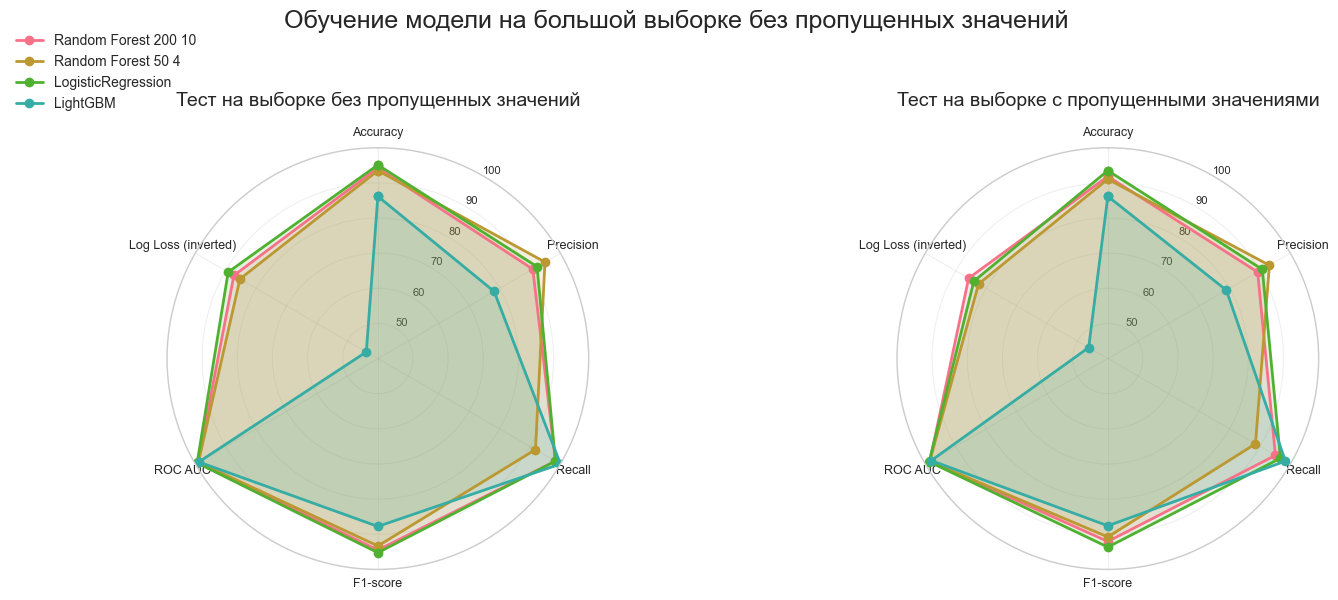

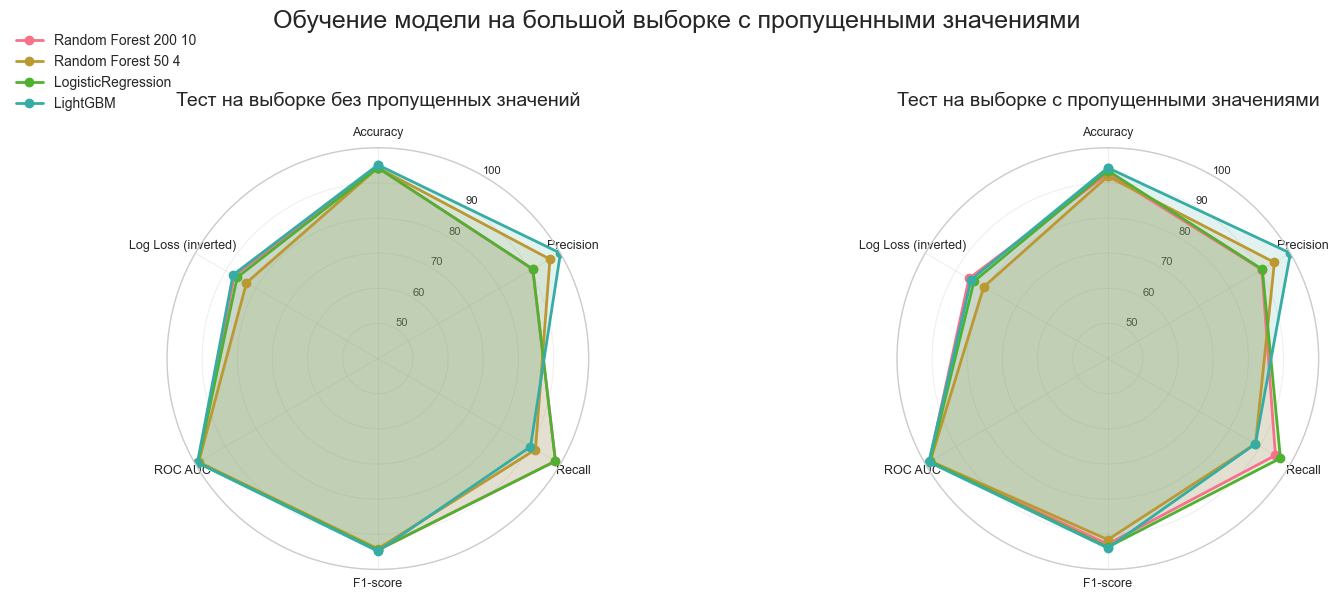

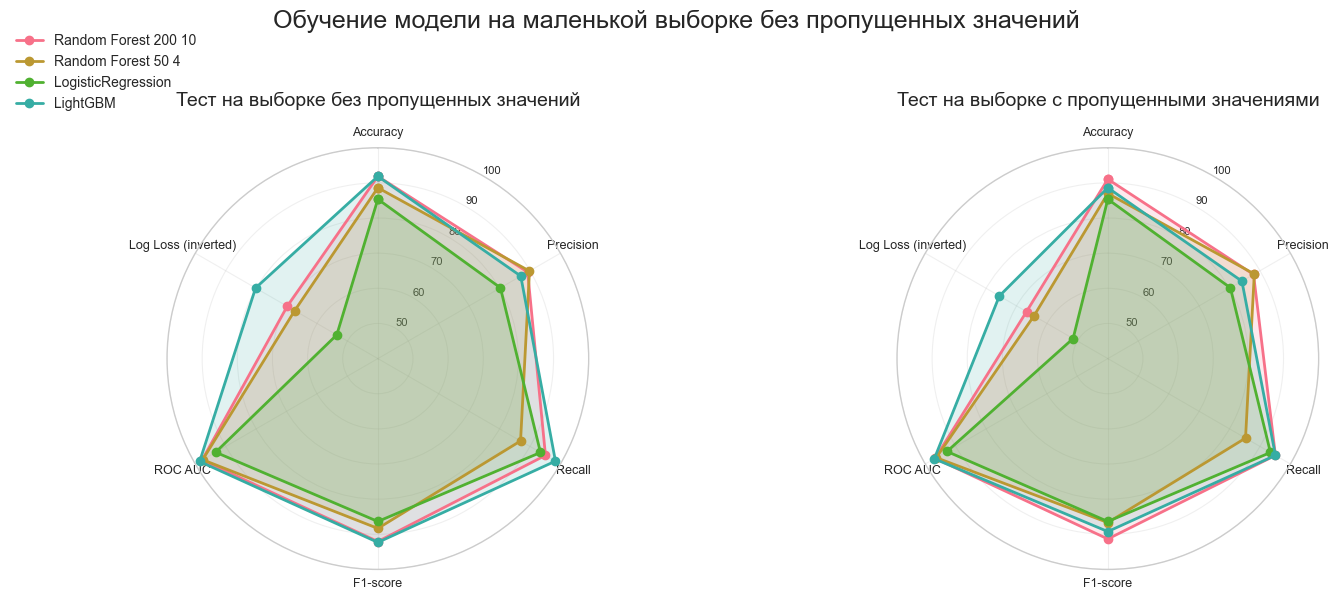

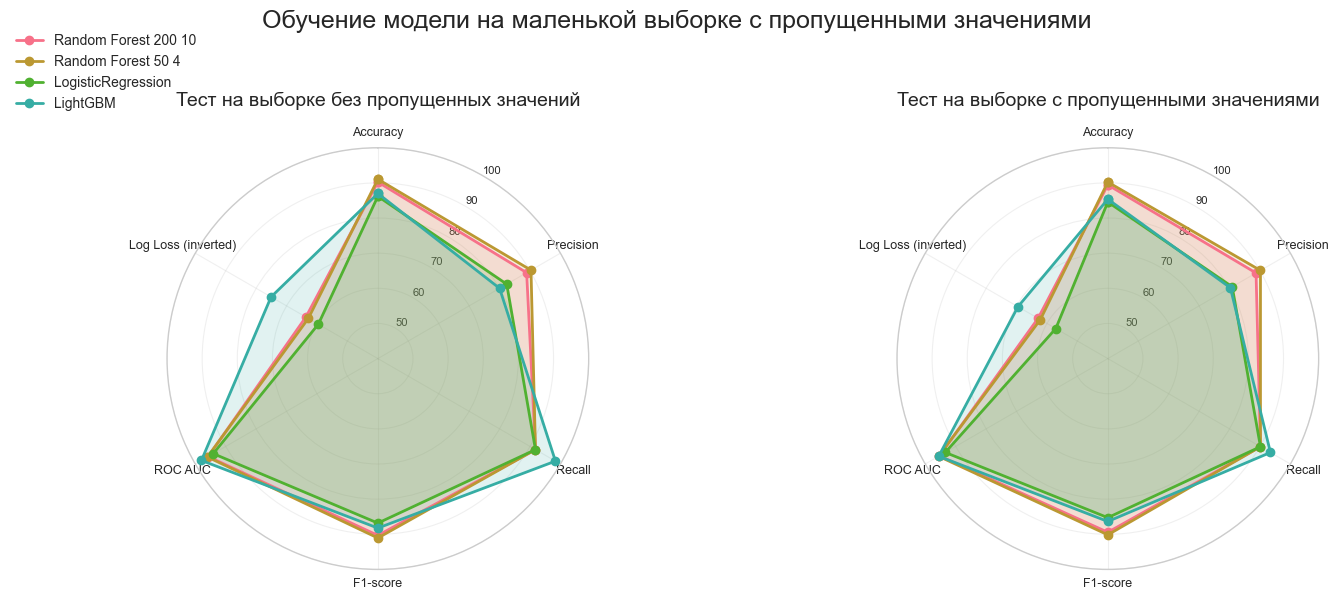

In [2]:
# Функция для создания радиального графика
def create_radar_chart(ax, models_data, title, position):
    df_models = pd.DataFrame(models_data)
    
    # Подготовка данных для радиального графика
    metrics_for_radar = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
    values = df_models[metrics_for_radar].values

    # Инвертируем Log Loss
    log_loss_inverted = 100 - df_models['Log Loss'] * 100

    # Добавляем нормализованный Log Loss к метрикам
    values_with_logloss = np.column_stack([values, log_loss_inverted])
    metrics_for_radar_all = metrics_for_radar + ['Log Loss (inverted)']

    # Настройка углов для радиального графика
    num_vars = len(metrics_for_radar_all)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Отрисовка радиального графика
    for i, model in enumerate(df_models['Model']):
        values_model = values_with_logloss[i].tolist()
        values_model += values_model[:1]
        ax.plot(angles, values_model, 'o-', linewidth=2, label=model)
        ax.fill(angles, values_model, alpha=0.15)

    # Настройка внешнего вида
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics_for_radar_all, fontsize=9)
    ax.set_ylim(40, 100)
    ax.set_rlabel_position(30)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_title(title, size=14, pad=15)
    
    # Добавляем легенду только для левых графиков
    if position == 'left':
        ax.legend(loc='upper right', bbox_to_anchor=(0.1, 1.3), fontsize=10)

# Создаем 4 фигуры, каждая с 2 подграфиками
fig_height = 7  # высота каждой фигуры
fig_width = 16  # ширина каждой фигуры

# Фигура 1
fig1 = plt.figure(figsize=(fig_width, fig_height))
fig1.suptitle('Обучение модели на большой выборке без пропущенных значений', fontsize=18, y=0.85)

ax1 = fig1.add_subplot(121, projection='polar')
ax2 = fig1.add_subplot(122, projection='polar')

create_radar_chart(ax1, models_data_test1, 'Тест на выборке без пропущенных значений', 'left')
create_radar_chart(ax2, models_data_test2, 'Тест на выборке с пропущенными значениями', 'right')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Фигура 2
fig2 = plt.figure(figsize=(fig_width, fig_height))
fig2.suptitle('Обучение модели на большой выборке с пропущенными значениями', fontsize=18, y=0.85)

ax3 = fig2.add_subplot(121, projection='polar')
ax4 = fig2.add_subplot(122, projection='polar')

create_radar_chart(ax3, models_data_test3, 'Тест на выборке без пропущенных значений', 'left')
create_radar_chart(ax4, models_data_test4, 'Тест на выборке с пропущенными значениями', 'right')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Фигура 3
fig3 = plt.figure(figsize=(fig_width, fig_height))
fig3.suptitle('Обучение модели на маленькой выборке без пропущенных значений', fontsize=18, y=0.85)

ax5 = fig3.add_subplot(121, projection='polar')
ax6 = fig3.add_subplot(122, projection='polar')

create_radar_chart(ax5, models_data_test5, 'Тест на выборке без пропущенных значений', 'left')
create_radar_chart(ax6, models_data_test6, 'Тест на выборке с пропущенными значениями', 'right')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Фигура 4
fig4 = plt.figure(figsize=(fig_width, fig_height))
fig4.suptitle('Обучение модели на маленькой выборке с пропущенными значениями', fontsize=18, y=0.85)

ax7 = fig4.add_subplot(121, projection='polar')
ax8 = fig4.add_subplot(122, projection='polar')

create_radar_chart(ax7, models_data_test7, 'Тест на выборке без пропущенных значений', 'left')
create_radar_chart(ax8, models_data_test8, 'Тест на выборке с пропущенными значениями', 'right')

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Показать все фигуры
plt.show()